# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
#from coin import coin


# Для запуска локально используйте:
#
import scipy.stats as sps
#
coin = sps.bernoulli.rvs(p=0.5)


def uniform(size=1, precision=30):
    sizes_prod = np.array(size).prod();
    initial_arr = np.array([sps.bernoulli.rvs(p=0.5) for _ in range(sizes_prod * precision)]);
    return (initial_arr.reshape(sizes_prod, precision) * np.exp2((-1) * np.arange(1, precision + 1)) ).sum(axis=-1).reshape(size)
    # Читабельное решение в одну строчку не выходя за границы? ;)


def normal(size=1, loc=0, scale=1, precision=30):
    sizes_prod = np.array(size).prod();
    for_u, for_v = np.split(uniform(size=2*sizes_prod, precision=precision), 2);
    for_u = np.sqrt(-2 * np.log(for_u));
    for_v = np.cos(2 * np.pi * for_v);
    
    return (for_u * for_v * scale + loc).reshape(size)



def expon(size=1, lambd=1, precision=30):
    return -np.log(uniform(size, precision=precision)) / lambd;

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

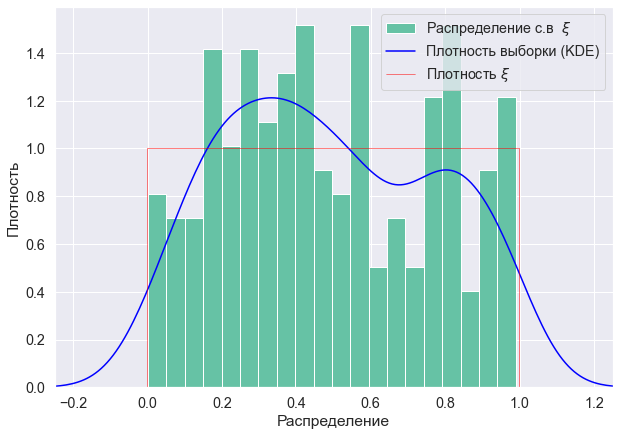

In [142]:
import scipy.stats as sps

def show_density_and_samples(samples, xbounds = (0,1), num_bins=20, pdf = sps.uniform.pdf):
    """
        samples - numpy.narray (n,)
        xbounds - tuple(min, max)
        num_bins - int
        density - str or numpy.narray(m,)
    """
    with sns.axes_style("darkgrid"):
        grid = np.linspace(xbounds[0], xbounds[1], 10000);
    
        fig, ax = plt.subplots(figsize=(10, 7));
        plt.hist(x=samples, density=True, bins=num_bins, label=r"Распределение с.в  $\xi $");
    
        sns.kdeplot(samples, label=r"Плотность выборки (KDE)", color="blue")
     
        plt.plot(
            grid,
            pdf(grid),
            color="red",
            lw=0.5,
            label=r"Плотность $\xi$",
        )
    
        plt.legend()
        plt.xlabel("Распределение")
        plt.ylabel("Плотность")
    
        ax.set_xlim(xbounds)

uni = uniform(size=200, precision=20);
show_density_and_samples(uni, xbounds=(-0.25, 1.25))

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

In [135]:
precision_values = [1, 2, 4, 5, 10, 20, 50, 100];

def show_samples_distr(distribution, precisions):
    fig, ax = plt.subplots(len(precisions) // 2, 2, figsize=(15, len(precisions) // 2 * 3));
    
    for i in range(len(precisions)):
        sns.scatterplot(x = distribution(size = 100, precision=precisions[i]), y = np.zeros(100), ax=ax[i // 2][i % 2])
        ax[i // 2][i % 2].grid(False)
        ax[i // 2][i % 2].set_yticks([])
        ax[i // 2][i % 2].set_xlabel("precision="+str(precisions[i]))
    fig.tight_layout()

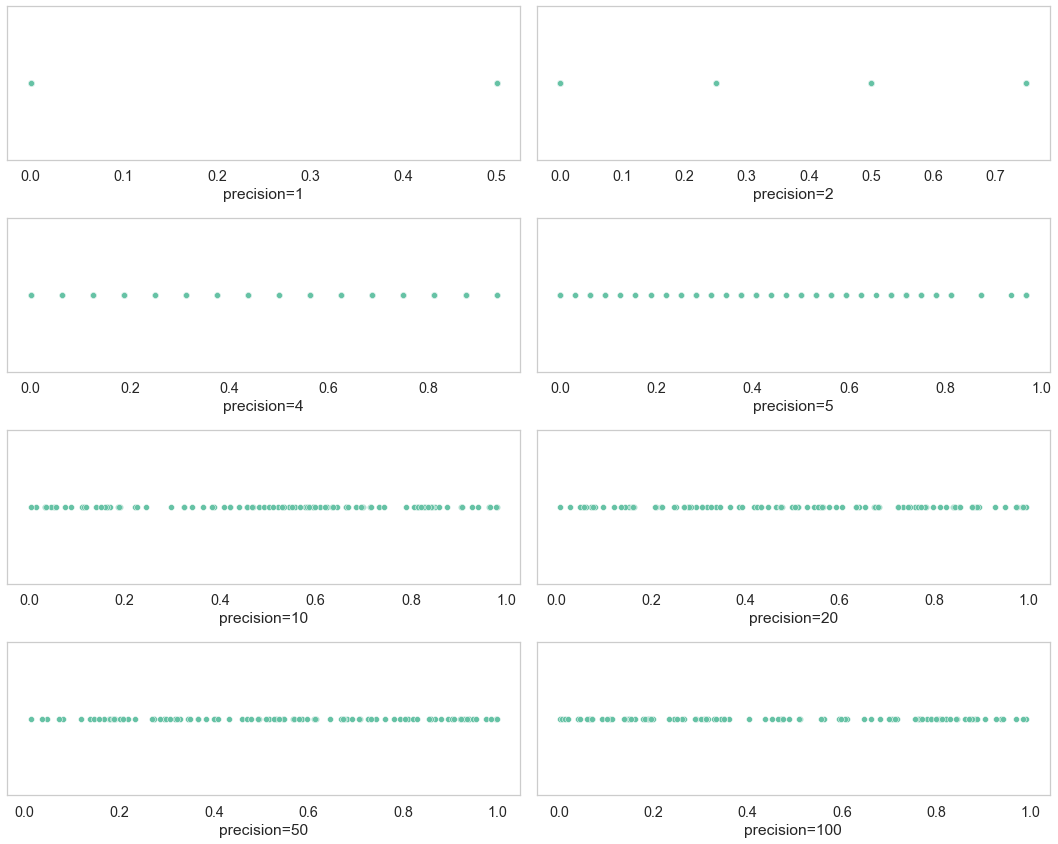

In [136]:
show_samples_distr(uniform, precision_values)

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

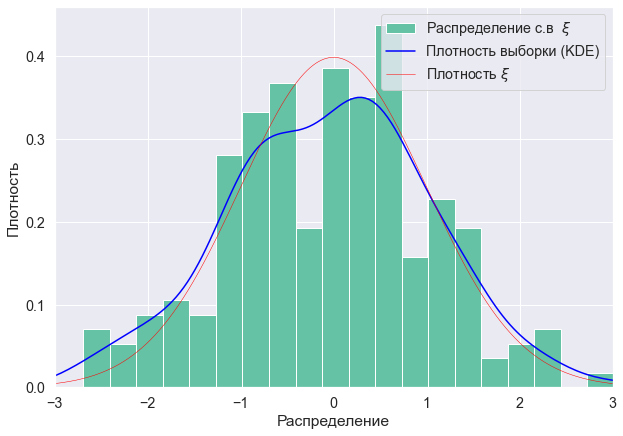

In [143]:
norm = normal(size=200, precision=30);
show_density_and_samples(norm, xbounds=(-3, 3), pdf=sps.norm.pdf)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

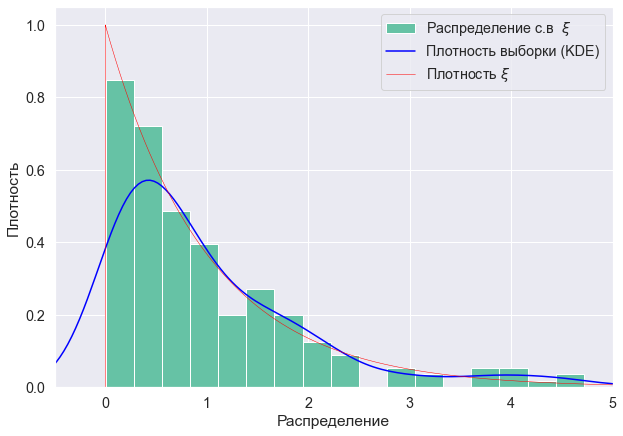

In [144]:
exp = expon(size=200, lambd=1, precision=30);
show_density_and_samples(exp, xbounds=(-0.5, 5), pdf=sps.expon.pdf)

**Выводы:**

Точность сгенерированных семплов влияет на разнообразность семплов распределения, чем больше точность тем ближе график приближается к реальной плотности, но нужно соответственно увеличивать bins_number

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [181]:
def compare_distributions(distributions, distributions_names, xbounds=(-1,1), number_of_samples = 100):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(10, 7));
        grid = np.linspace(xbounds[0], xbounds[1], 10000);
        for i in range(len(distributions)):
            sns.lineplot(x=grid, y=distributions[i](grid), ax=ax, label=distributions_names[i]);
           
        ax.set_xlim(xbounds)
        ax.set_xlabel("Значение")
        ax.set_ylabel("Плотность")

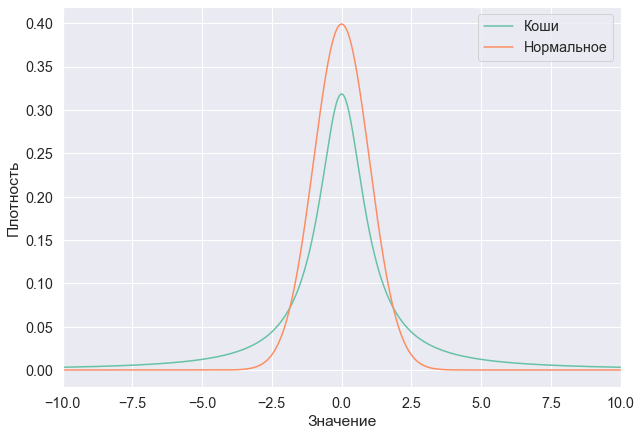

In [184]:
compare_distributions([sps.cauchy(loc=0, scale=1).pdf, sps.norm(scale=1, loc=0).pdf], ["Коши", "Нормальное"], xbounds=(-10,10))

Из графика видно, что "хвосты" распределения Коши убывают медленне, что указывает на то,
что выбросы или же экстремальные значения у распределения Коши случаються чаще чем у нормального.
Из-за такой особенности распределения Коши не имеет математического ожидания, и следовательно дисперсии. Всё это нужно учитывать при работе с этим распределением

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [237]:
def cummedian_sorted(a):
    n = a.size
    maxn = a.max()+1
    a_tiled_sorted = np.tile(a,n).reshape(-1,n)
    mask = np.triu(np.ones((n,n),dtype=bool),1)

    a_tiled_sorted[mask] = maxn
    a_tiled_sorted.sort(1)

    all_rows = a_tiled_sorted[np.arange(n), np.arange(n)//2].astype(float)
    idx = np.arange(1,n,2)
    even_rows = a_tiled_sorted[idx, np.arange(1,1+(n//2))]
    all_rows[idx] += even_rows
    all_rows[1::2] /= 2.0
    return all_rows

In [302]:
def LLN_test(distribution, ybounds=(-100,100), avg_type="mean", max_number_samples=1000, num_trials=1, alpha=0.05):  
    data = distribution(size=(num_trials, max_number_samples));
    if avg_type == "mean":
        samples = data.cumsum(axis=1) / np.arange(1, max_number_samples + 1);      
    elif avg_type == "median":
        data = pd.DataFrame(data)
        samples = data.to_numpy()
    
    plt.figure(figsize=(15, 7))

    for i in range(num_trials):
        plt.plot(np.arange(max_number_samples) + 1, samples[i], color="green", alpha=alpha)

    plt.xlabel("Количество случайных величин")
    if avg_type == "mean":
        plt.ylabel("Значение среднего")
    elif avg_type == "median":
        plt.ylabel("Значение медианы")
    plt.xlim((0, max_number_samples));
    plt.ylim(ybounds)

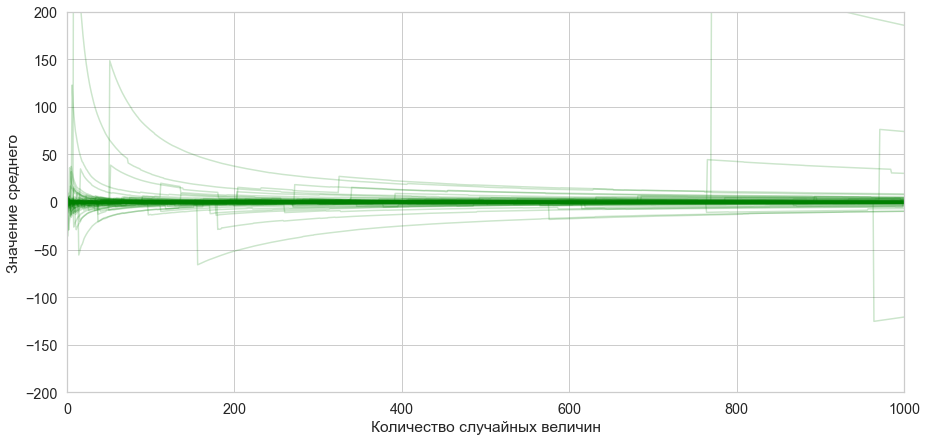

In [309]:
LLN_test(sps.cauchy.rvs, ybounds=(-200,200), avg_type="mean", max_number_samples=1000, num_trials=100, alpha=0.2)

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

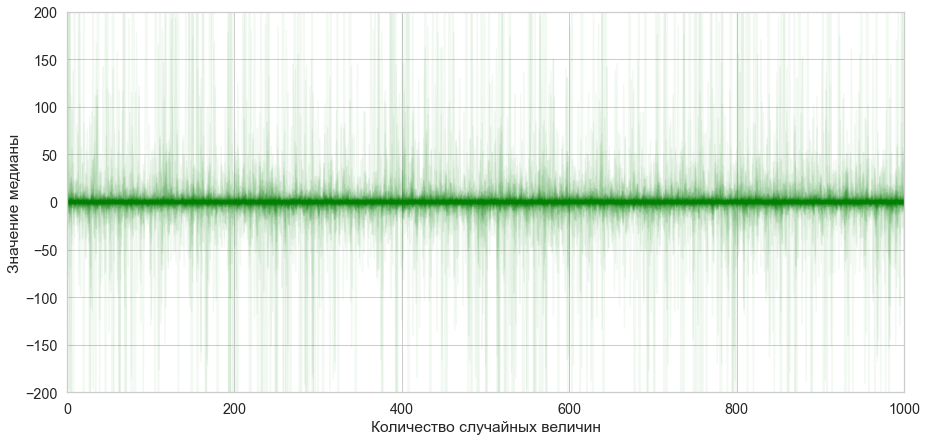

In [317]:
LLN_test(sps.cauchy.rvs, ybounds=(-200,200), avg_type="median", max_number_samples=1000, num_trials=100, alpha=0.05)

**Вывод:**

Закон больших чисел работает и для распределения Коши, но вот если заменить среднее случайных величин на медиану, то сходимость не будет зависеть от их количества, и её в принципе не будет

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [406]:
def CalculateF(camulative_means, expected, n):
    return np.mean(np.abs(camulative_means[:, n - 1] - expected))

def ShowFDependency(max_sample_size, number_of_samples, a, epsilon, display = True):
    data = sps.bernoulli.rvs(p = 0.5, size=(number_of_samples, max_sample_size))
    
    #calculate camulative means
    data = data.cumsum(axis=1) / np.arange(1, max_sample_size + 1);
    
    n_values = np.arange(1, max_sample_size + 1);
    F_values = np.array([CalculateF(data, a, n_val) for n_val in n_values])
    needed = np.where(F_values <= epsilon)[0][0]

    if display == True:
        with sns.axes_style("darkgrid"):
            fig, ax = plt.subplots(1, 2, figsize=(15, 7));
            sns.lineplot(x = n_values, y=F_values, ax=ax[0], color="blue")
            res = sns.lineplot(x = n_values, y=F_values, ax=ax[1], color="blue")
            res.set(xscale="log")
        
            ax[0].set_xlabel("Размер выборки")
            ax[0].set_ylabel("Значение F(n)")
            ax[0].axvline(x=needed, linestyle="--", color="red", linewidth=2)
            ax[0].text(needed, epsilon, f'n={needed}', fontsize=20, ha='left', va='bottom', color='red')
        
            ax[1].set_xlabel("Размер выборки (логарифмический scale)")
            ax[1].set_ylabel("Значение F(n)")
            ax[1].axvline(x=needed, linestyle="--", color="red", linewidth=2)
            ax[1].text(needed, epsilon, f'n={needed}', fontsize=20, ha='left', va='bottom', color='red')
        
            plt.tight_layout()
    return needed;

413

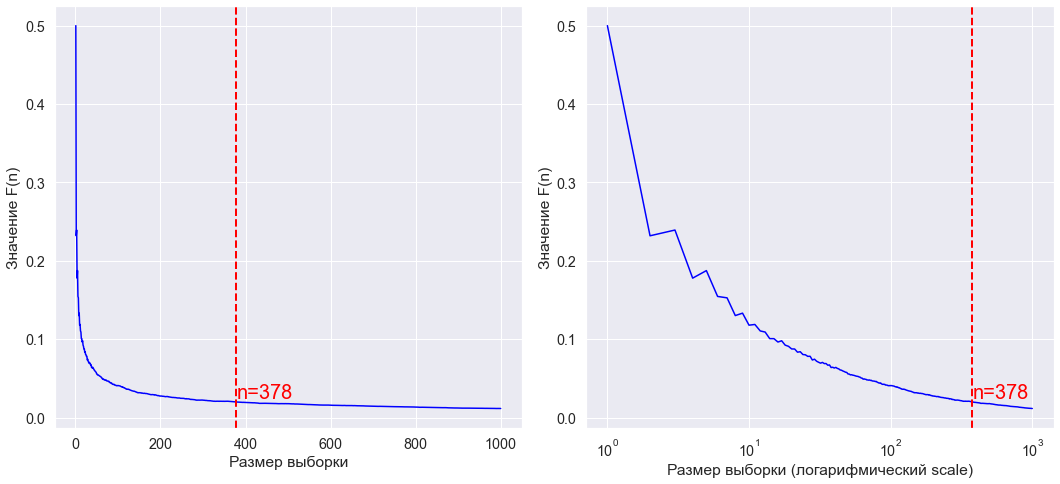

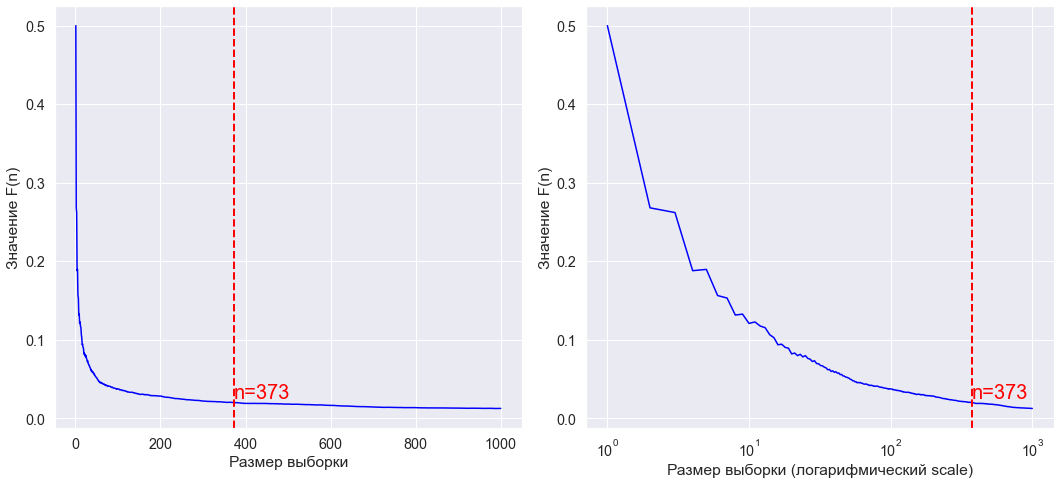

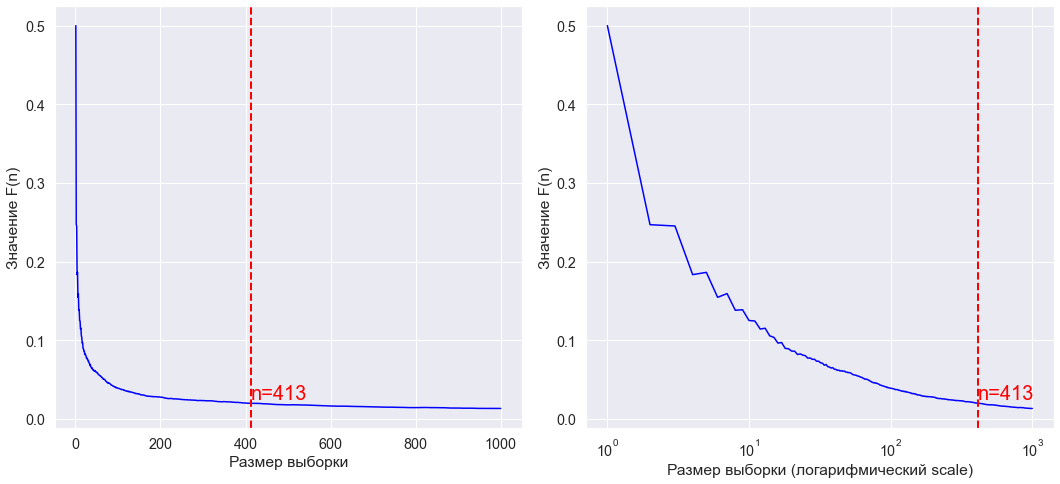

In [407]:
a = 0.5
epsilon = 0.02
K = 500
size_of_sample = 1000

ShowFDependency(size_of_sample, K, a, epsilon)
ShowFDependency(size_of_sample, K, a, epsilon)
ShowFDependency(size_of_sample, K, a, epsilon)

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

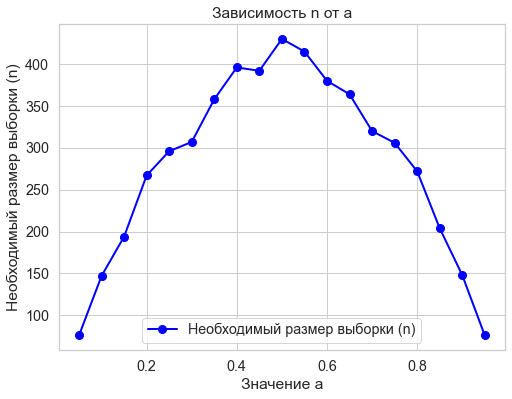

In [404]:
epsilon = 0.02
samples_count = 1000  # Количество выборок
size = 1000  # Размер каждой выборки
a_values = np.arange(0.05, 1, 0.05)  # Значения a

# Список для хранения необходимого размера выборки для каждого a
n_values = []

# Проходим по значениям a
for a in a_values:
    # Генерируем выборку и вычисляем кумулятивные средние
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # Функция для вычисления F(n)
    def calculate_F(n, cum_means, a):
        return np.mean(np.abs(cum_means[:, n - 1] - a))

    # Вычисляем F(n) для всех значений n
    n_values_a = np.arange(1, size + 1)
    F_values_a = np.array([calculate_F(n_val, cum_means, a) for n_val in n_values_a])

    # Используем np.where для поиска необходимого размера выборки
    n_a = np.where(F_values_a <= epsilon)[0][0] + 1
    n_values.append(n_a)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(a_values, n_values, marker='o', color='blue', linewidth=2, markersize=8, label='Необходимый размер выборки (n)')
plt.xlabel('Значение a')
plt.ylabel('Необходимый размер выборки (n)')
plt.title('Зависимость n от a')
plt.legend()
plt.grid(True)

**Выводы:**

1-й вопрос:
- По анализу графиков можно заметить обратную зависимость как на простых, так и на логарифмических графиках.
- Проведя несколько экспериментов (всего 3), мы выяснили, что в среднем необходимый размер выборки составляет около 400. Значения варьируются от 397 до 415 на трех графиках.

2-й вопрос:
- Анализируя график, мы можем точно определить зависимость размера выборки от значения "a". По данным на графике, приблизительно при $a=0.5$ значение $F(n) \leqslant 0.02$, что соответствует размеру выборки около 400.
- Полученное распределение напоминает нормальное, поскольку отклонения как вправо, так и влево от значения 0.5 приводят к значениям выборки меньше 400. Пик распределения достигается в середине, что говорит о его симметричности. Симметричное распределение обуславливает симметричный график вида $x = 0.5 \pm \text{погрешность}$.
- Наконец, последний график демонстрирует зависимость от математического ожидания. Эта зависимость может быть приближена параболой.